In [29]:
# Create an interpreter agent that can evaluate the performance of different LLMs
from interpreter_agent_evaluation import LLMInterpreter
# Choose two different API keys and two different base URLs for different models
from constants_evaluation import api_key_1, api_key_2, base_url_1, base_url_2, model_1, model_2, model_3, model_1_name, model_2_name, model_3_name
import os
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
labelencoder_path = "CLASSIFIER/saved_models/label_encoder.joblib"
labelencoder = joblib.load(labelencoder_path)

In [31]:
def measure_accuracy(model_name, df, test_column, prediction_column):
    y_test = df[test_column]
    y_pred = df[prediction_column]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix with original labels
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    cm = np.round(cm * 100, 2)
    labels = labelencoder.inverse_transform(sorted(df['task type'].unique()))

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Interpreter Agent ({model_name} Model)')
    plt.savefig(f'evaluation_llms_graphs/CM_Interpreter_Agent_{model_name}.png')
    plt.show()

In [32]:
df = pd.read_csv('evaluation_data_combined.csv')
df

,prompt,task type,file path,correct file path
0,Make a readable version of the speech in this ...,VTT,silent_sky_0.pdf,0
1,Can you transcribe the dialogue in this film c...,VTT,sunny_document_1.jpeg,0
2,Write down all the words spoken in this record...,VTT,smooth_moment_2.mov,1
3,What is being said in this short film?,VTT,crazy_moment_3.jpeg,0
4,Turn this video into written form.,VTT,crazy_moment_4.pdf,0
...,...,...,...,...
225,Make an auditory rendering of this PNG.,ITA,sunny_moment_15.ogg,0
226,I want to hear what’s in this photo.,ITA,crazy_sky_16.txt,0
227,Provide an audible explanation of this image.,ITA,sunny_scene_17.mp4,0
228,What do you see in this photo? Say it out loud.,ITA,sunny_painting_18.bmp,1


In [33]:
possible_labels = df['task type'].unique().tolist()
print(f"Possible labels: {possible_labels}")

Possible labels: ['VTT', 'ATV', 'STT', 'TTS', 'TTI', 'UNK', 'ATI', 'TTV', 'ITT', 'ITA']


In [26]:
# Initialize agents
interpreter_1 = LLMInterpreter(model_1, api_key_1, base_url_1, model_1_name)
interpreter_2 = LLMInterpreter(model_2, api_key_2, base_url_2, model_2_name)
interpreter_3 = LLMInterpreter(model_3, api_key_2, base_url_2, model_3_name)

LLM Interpreter initialized with model: GLM-4-Flash
LLM Interpreter initialized with model: LLaMA-3-1-70B
LLM Interpreter initialized with model: GPT-3.5-Turbo


In [27]:
df['task type'] = labelencoder.transform(df['task type'])

In [28]:
df['prediction_model_1'] = 'UNK'
df['prediction_model_2'] = 'UNK'
df['prediction_model_3'] = 'UNK'

### Evaluate the first model (glm-4-flash)

In [ ]:
n_errors_model_1 = 0
indices_errors_model_1 = []
for i in range(len(df)):
    prompt = df['prompt'][i]
    try:
        prediction_1 = interpreter_1.get_task_type(prompt)
        if prediction_1 in possible_labels:
            df['prediction_model_1'][i] = prediction_1
        else:
            n_errors_model_1 += 1
            indices_errors_model_1.append(i)
    except:
        n_errors_model_1 += 1
        indices_errors_model_1.append(i)
print(f"Number of errors for model 1: {n_errors_model_1}")

In [ ]:
df['prediction_model_1'] = labelencoder.transform(df['prediction_model_1'])

Accuracy: 0.774
Precision: 0.797
Recall: 0.774
F1-score: 0.774

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.71      0.50      0.59        20
           2       1.00      0.60      0.75        20
           3       0.94      0.85      0.89        20
           4       0.94      0.75      0.83        20
           5       0.72      0.90      0.80        20
           6       0.89      0.85      0.87        20
           7       0.66      0.95      0.78        20
           8       0.67      0.78      0.72        50
           9       0.94      0.80      0.86        20

    accuracy                           0.77       230
   macro avg       0.82      0.77      0.78       230
weighted avg       0.80      0.77      0.77       230



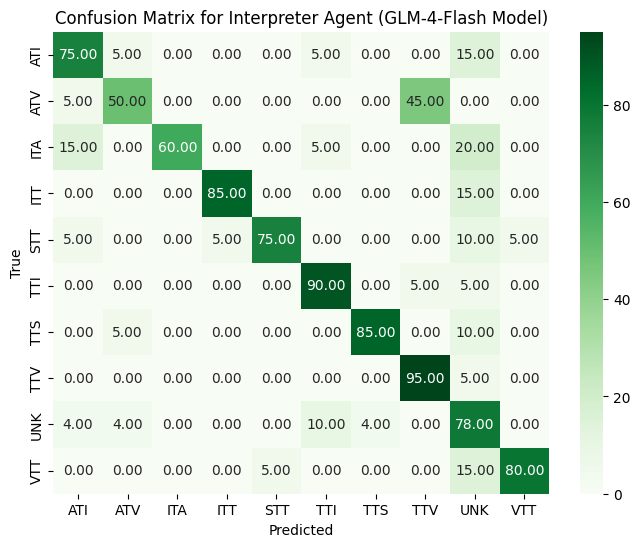

In [45]:
measure_accuracy(model_1_name, df, 'task type', 'prediction_model_1')

### Evaluate the second model (Llama-3-1-70B-Instruct)

In [ ]:
n_errors_model_2 = 0
indices_errors_model_2 = []
for i in range(len(df)):
    prompt = df['prompt'][i]
    try:
        prediction_2 = interpreter_2.get_task_type(prompt)
        if prediction_2 in possible_labels:
            df['prediction_model_2'][i] = prediction_2
        else:
            n_errors_model_2 += 1
            indices_errors_model_2.append(i)
    except:
        n_errors_model_2 += 1
        indices_errors_model_2.append(i)
print(f"Number of errors for model 2: {n_errors_model_2}")

In [ ]:
df['prediction_model_2'] = labelencoder.transform(df['prediction_model_2'])

Accuracy: 0.835
Precision: 0.846
Recall: 0.835
F1-score: 0.833

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.83      0.95      0.88        20
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        20
           4       0.93      0.65      0.76        20
           5       0.95      0.90      0.92        20
           6       0.94      0.80      0.86        20
           7       0.82      0.90      0.86        20
           8       0.66      0.78      0.72        50
           9       0.85      0.55      0.67        20

    accuracy                           0.83       230
   macro avg       0.87      0.84      0.85       230
weighted avg       0.85      0.83      0.83       230



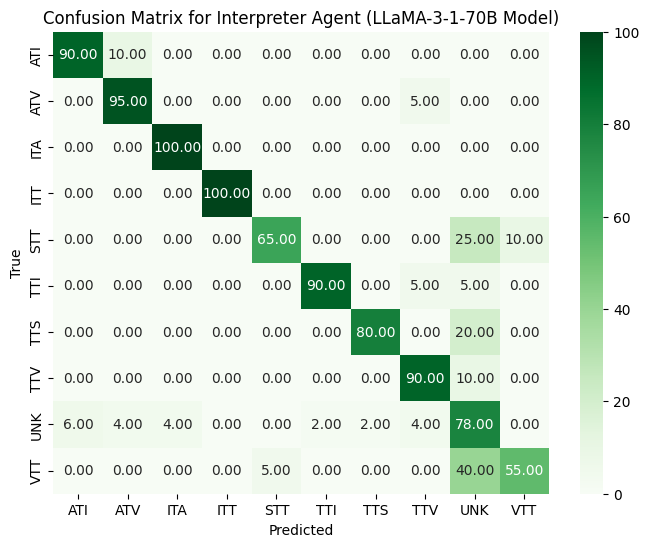

In [47]:
measure_accuracy(model_2_name, df, 'task type', 'prediction_model_2')

### Evaluate the third model (gpt-3.5-turbo)

In [ ]:
n_errors_model_3 = 0
indices_errors_model_3 = []
for i in range(len(df)):
    prompt = df['prompt'][i]
    try:
        prediction_3 = interpreter_3.get_task_type(prompt)
        if prediction_3 in possible_labels:
            df['prediction_model_3'][i] = prediction_3
        else:
            n_errors_model_3 += 1
            indices_errors_model_3.append(i)
    except:
        n_errors_model_3 += 1
        indices_errors_model_3.append(i)
print(f"Number of errors for model 3: {n_errors_model_3}")

In [ ]:
df['prediction_model_3'] = labelencoder.transform(df['prediction_model_3'])

Accuracy: 0.865
Precision: 0.880
Recall: 0.865
F1-score: 0.865

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.84      0.80      0.82        20
           2       1.00      0.90      0.95        20
           3       1.00      1.00      1.00        20
           4       0.84      0.80      0.82        20
           5       1.00      0.60      0.75        20
           6       0.91      1.00      0.95        20
           7       0.94      0.85      0.89        20
           8       0.71      0.90      0.80        50
           9       0.94      0.85      0.89        20

    accuracy                           0.87       230
   macro avg       0.91      0.86      0.88       230
weighted avg       0.88      0.87      0.87       230



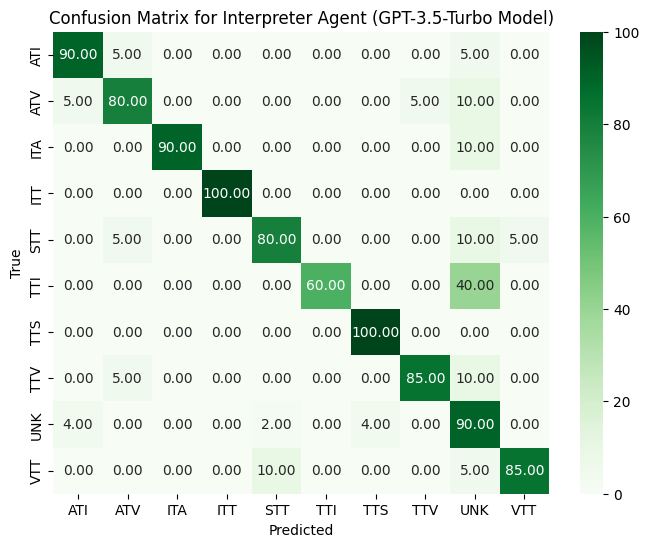

In [49]:
measure_accuracy(model_3_name, df, 'task type', 'prediction_model_3')

In [36]:
df.to_csv('evaluation_data_combined_with_predictions.csv', index=False)
print("Evaluation completed and results saved to 'evaluation_data_combined_with_predictions.csv'")

Evaluation completed and results saved to 'evaluation_data_combined_with_predictions.csv'


In [45]:
df = pd.read_csv('evaluation_data_combined_with_predictions.csv')
df

,prompt,task type,file path,correct file path,prediction_model_1,prediction_model_2,prediction_model_3
0,Make a readable version of the speech in this ...,9,silent_sky_0.pdf,0,8,8,4
1,Can you transcribe the dialogue in this film c...,9,sunny_document_1.jpeg,0,9,9,9
2,Write down all the words spoken in this record...,9,smooth_moment_2.mov,1,4,4,4
3,What is being said in this short film?,9,crazy_moment_3.jpeg,0,8,9,8
4,Turn this video into written form.,9,crazy_moment_4.pdf,0,9,9,9
...,...,...,...,...,...,...,...
225,Make an auditory rendering of this PNG.,2,sunny_moment_15.ogg,0,0,2,2
226,I want to hear what’s in this photo.,2,crazy_sky_16.txt,0,2,2,2
227,Provide an audible explanation of this image.,2,sunny_scene_17.mp4,0,2,2,2
228,What do you see in this photo? Say it out loud.,2,sunny_painting_18.bmp,1,2,2,2


In [ ]:
# all task types are distributed equally except for UNK
df['task type'].value_counts() / len(df)

8    0.217391
9    0.086957
1    0.086957
4    0.086957
6    0.086957
5    0.086957
0    0.086957
7    0.086957
3    0.086957
2    0.086957
Name: task type, dtype: float64

### Analyze the errors

##### Cases where models failed to indentify the task type

In [51]:
indices_errors_model_1

[8, 71, 161, 191]

In [52]:
indices_errors_model_2

[7, 8, 10, 13, 15, 19, 46, 73, 187]

In [53]:
indices_errors_model_3

[222]

In [55]:
df.iloc[8]

prompt                Produce a transcript for this interview video.
task type                                                          9
file path                                            fuzzy_sky_8.pdf
correct file path                                                  0
prediction_model_1                                                 8
prediction_model_2                                                 8
prediction_model_3                                                 9
Name: 8, dtype: object

##### Cases where at least two models identified the wrong task type

In [46]:
# Filter rows where at least two predictions are not equal to 'task type'
filtered_df = df.copy()

# Count how many predictions are not equal to 'task type' for each row
mismatch_count = (
    (filtered_df['prediction_model_1'] != filtered_df['task type']).astype(int) +
    (filtered_df['prediction_model_2'] != filtered_df['task type']).astype(int) +
    (filtered_df['prediction_model_3'] != filtered_df['task type']).astype(int)
)

filtered_df = filtered_df[mismatch_count >= 2]
filtered_df

,prompt,task type,file path,correct file path,prediction_model_1,prediction_model_2,prediction_model_3
0,Make a readable version of the speech in this ...,9,silent_sky_0.pdf,0,8,8,4
2,Write down all the words spoken in this record...,9,smooth_moment_2.mov,1,4,4,4
3,What is being said in this short film?,9,crazy_moment_3.jpeg,0,8,9,8
8,Produce a transcript for this interview video.,9,fuzzy_sky_8.pdf,0,8,8,9
21,Craft a video sequence for this spoken story.,1,sunny_recording_1.wav,1,7,7,8
25,Turn this sound recording into a visual presen...,1,quiet_river_5.ogg,1,0,1,0
32,Animate a visual scene from this narration.,1,crazy_video_12.jpg,0,7,1,7
39,Produce a video that illustrates this podcast ...,1,crazy_moment_19.docx,0,7,1,8
43,Type out what this person is saying.,4,dark_forest_3.mp3,1,3,8,8
49,Generate captions from this sound file.,4,sunny_river_9.jpeg,0,0,9,1


In [49]:
filtered_df['task type'] = labelencoder.inverse_transform(filtered_df['task type'])
filtered_df

,prompt,task type,file path,correct file path,prediction_model_1,prediction_model_2,prediction_model_3
0,Make a readable version of the speech in this ...,VTT,silent_sky_0.pdf,0,8,8,4
2,Write down all the words spoken in this record...,VTT,smooth_moment_2.mov,1,4,4,4
3,What is being said in this short film?,VTT,crazy_moment_3.jpeg,0,8,9,8
8,Produce a transcript for this interview video.,VTT,fuzzy_sky_8.pdf,0,8,8,9
21,Craft a video sequence for this spoken story.,ATV,sunny_recording_1.wav,1,7,7,8
25,Turn this sound recording into a visual presen...,ATV,quiet_river_5.ogg,1,0,1,0
32,Animate a visual scene from this narration.,ATV,crazy_video_12.jpg,0,7,1,7
39,Produce a video that illustrates this podcast ...,ATV,crazy_moment_19.docx,0,7,1,8
43,Type out what this person is saying.,STT,dark_forest_3.mp3,1,3,8,8
49,Generate captions from this sound file.,STT,sunny_river_9.jpeg,0,0,9,1


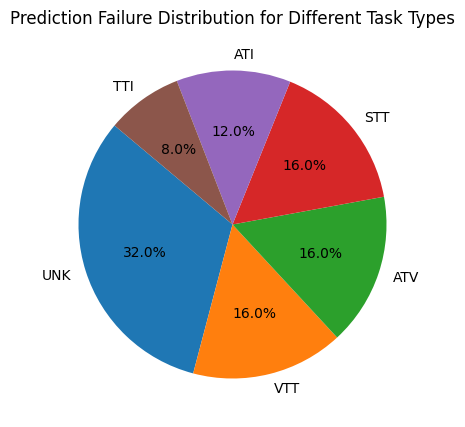

In [54]:
task_type_counts = filtered_df['task type'].value_counts(normalize=True) * 100

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(task_type_counts, labels=task_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Prediction Failure Distribution for Different Task Types')
plt.savefig('evaluation_llms_graphs/prediction_failure_distribution.png')
plt.show()